<a href="https://colab.research.google.com/github/sheikhi-a/Big-data-with-Python/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 30
n_features = 2
n_clusters = 2

data = np.vstack([
    np.random.randn(n_samples // n_clusters, n_features) + np.array([3, 3]),
    np.random.randn(n_samples // n_clusters, n_features) + np.array([7, 7]),
])

centroid_indices = np.random.choice(data.shape[0], size=n_clusters, replace=False)
centroids = data[centroid_indices]

distances = np.zeros((data.shape[0], n_clusters))
for i in range(n_clusters):
    distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)

labels = np.argmin(distances, axis=1)

for i in range(n_clusters):
    if np.any(labels == i):
        centroids[i] = data[labels == i].mean(axis=0)

for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering (1 Iteration, 2 Clusters, 30 Samples)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


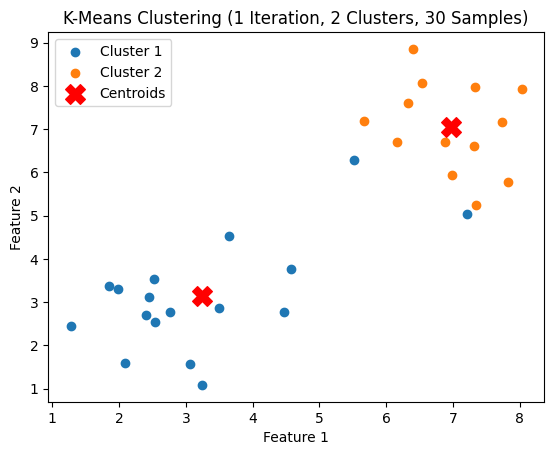

In [ ]:
for i in range(n_clusters):
    distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)

labels = np.argmin(distances, axis=1)

for i in range(n_clusters):
    if np.any(labels == i):
        centroids[i] = data[labels == i].mean(axis=0)

for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering (1 Iteration, 2 Clusters, 30 Samples)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Converged after 2 iterations.


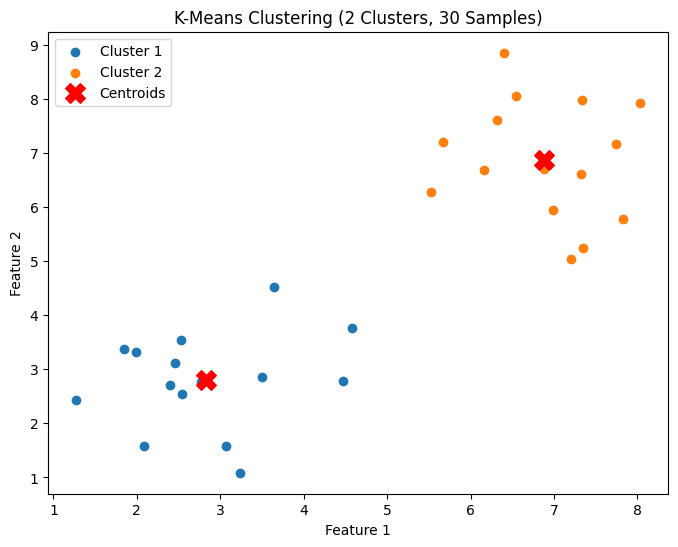

In [ ]:
max_iters = 100
tolerance = 1e-4

for iteration in range(max_iters):
    # Compute distances between each point and the centroids
    distances = np.zeros((data.shape[0], n_clusters))
    for i in range(n_clusters):
        distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)

    # Assign each point to the nearest centroid
    labels = np.argmin(distances, axis=1)

    # Save the old centroids to check for convergence
    old_centroids = centroids.copy()

    # Update centroids to the mean of their assigned points
    for i in range(n_clusters):
        if np.any(labels == i):  # Avoid empty clusters
            centroids[i] = data[labels == i].mean(axis=0)

    # Check for convergence
    if np.all(np.linalg.norm(centroids - old_centroids, axis=1) < tolerance):
        print(f"Converged after {iteration + 1} iterations.")
        break

# Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering (2 Clusters, 30 Samples)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

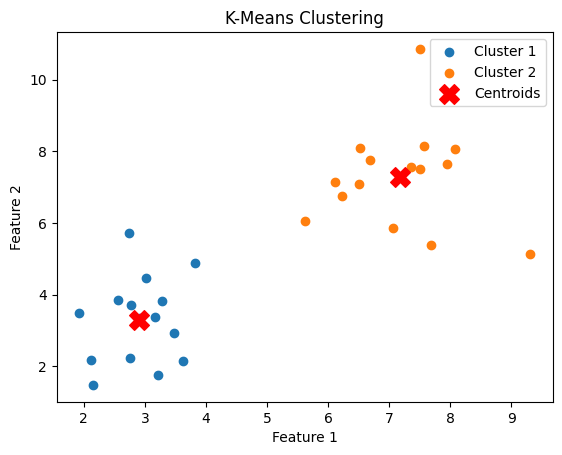

In [ ]:
from sklearn.cluster import KMeans


random_state = 42
n_samples = 30
n_features = 2
n_clusters = 2

data = np.vstack([
    np.random.randn(n_samples // n_clusters, n_features) + np.array([3, 3]),
    np.random.randn(n_samples // n_clusters, n_features) + np.array([7, 7]),
])

kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_


for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Text(0, 0.5, 'Income')

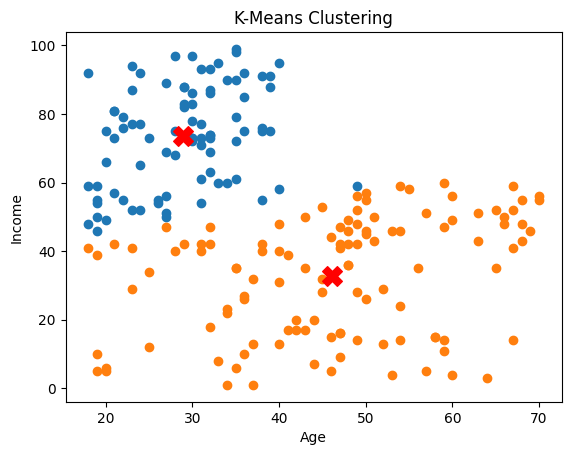

In [ ]:
import pandas as pd

df=pd.read_csv('Mall_Customers.csv')
df.head()

df.drop('CustomerID',inplace=True,axis=1)
df.columns=['Gender','Age','Annual_Income','Spending_Score']
df.shape

data = df[['Age','Spending_Score']].values
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Age')  # Use column name for x-axis
plt.ylabel('Income')  # Use column name for y-axis

Text(0, 0.5, 'Income')

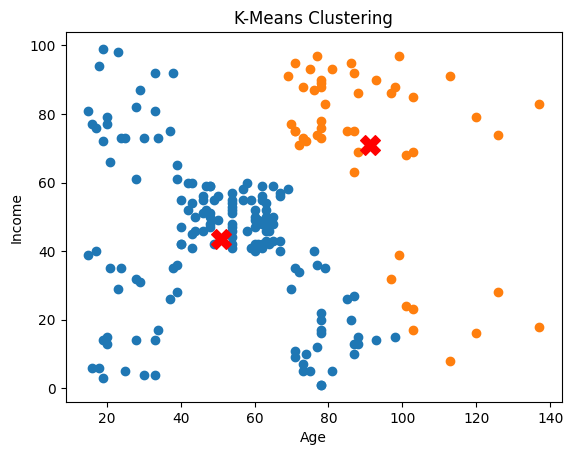

In [ ]:

data = df[['Annual_Income','Spending_Score']].values
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Age')  # Use column name for x-axis
plt.ylabel('Income')  # Use column name for y-axis

Text(0, 0.5, 'WCSS')

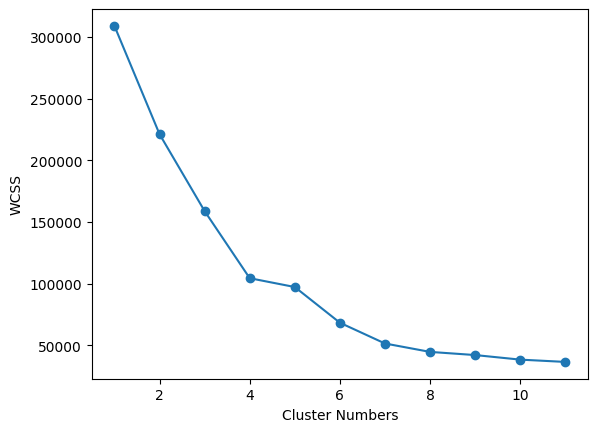

In [ ]:
from sklearn.preprocessing import LabelBinarizer

encoder=LabelBinarizer()
df['Gender']=encoder.fit_transform(df['Gender'])
cluster_no=[i for i in range(1,12)]
WCSS=[]
for i in cluster_no:
    cluster=KMeans(init='k-means++',n_clusters=i,random_state=42)
    cluster.fit(df)
    WCSS.append(cluster.inertia_)
plt.plot(cluster_no,WCSS,marker='o')
plt.xlabel('Cluster Numbers')
plt.ylabel('WCSS')

Text(0, 0.5, 'Income')

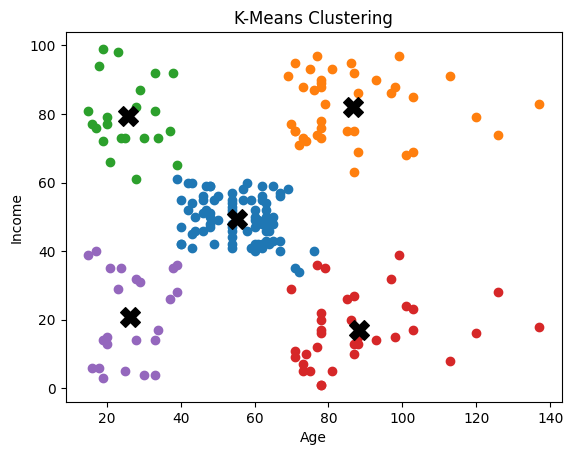

In [ ]:
n_clusters=5


data = df[['Annual_Income','Spending_Score']].values
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


for i in range(n_clusters):
    plt.scatter(data[labels == i, 0], data[labels == i, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Age')  # Use column name for x-axis
plt.ylabel('Income')  # Use column name for y-axis

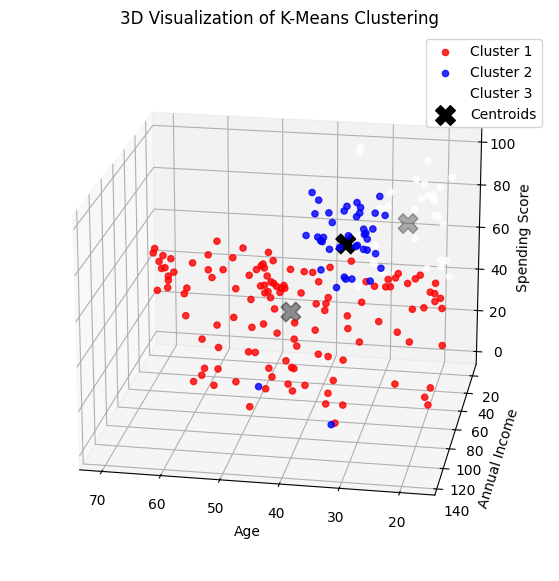

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Load and preprocess the dataset
df = pd.read_csv('Mall_Customers.csv')
df.drop('CustomerID', inplace=True, axis=1)
df.columns = ['Gender', 'Age', 'Annual_Income', 'Spending_Score']

# Select relevant features for clustering
data = df[['Age', 'Annual_Income', 'Spending_Score']].values

# Perform K-Means clustering
n_clusters = 3  # Set the number of clusters
random_state = 42
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 3D Visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Custom colors for clusters
colors = ['red', 'blue', 'white']

# Scatter plot of data points
for i in range(n_clusters):
    ax.scatter(
        data[labels == i, 0],  # Age
        data[labels == i, 1],  # Annual Income
        data[labels == i, 2],  # Spending Score
        c=colors[i], label=f'Cluster {i+1}', alpha=0.8
    )

# Plot the centroids
ax.scatter(
    centroids[:, 0],  # Centroid Age
    centroids[:, 1],  # Centroid Annual Income
    centroids[:, 2],  # Centroid Spending Score
    s=200, c='black', marker='X', label='Centroids'
)

# Change the viewing angle
ax.view_init(elev=20, azim=45)  # Adjust the elevation and azimuthal angle

# Labels and legend
ax.set_title('3D Visualization of K-Means Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.view_init(elev=20, azim=100)

ax.legend()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans

# Load and preprocess the dataset
df = pd.read_csv('Mall_Customers.csv')
df.drop('CustomerID', inplace=True, axis=1)
df.columns = ['Gender', 'Age', 'Annual_Income', 'Spending_Score']

# Select relevant features for clustering
data = df[['Age', 'Annual_Income', 'Spending_Score']].values

# Perform K-Means clustering
n_clusters = 4
random_state = 42
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(data)
labels = kmeans.labels_

# Add cluster labels to the DataFrame for visualization
df['Cluster'] = labels

# Create a 3D Scatter Plot with Plotly
fig = px.scatter_3d(
    df,
    x='Age',
    y='Annual_Income',
    z='Spending_Score',
    color='Cluster',
    title='3D Visualization of K-Means Clustering',
    symbol='Cluster',
    opacity=0.7
)

# Show the plot (interactive by default)
fig.show()
